# Basic Plotting with matplotlib

Now in previous versions of matplotlib we would use a backend specific for Jupyter called `nbagg`. But things have changed, and now we use an inline backend engine. Now, you don't really need to know the details of this, but it's helpful to know that you can investigate if you want to. Let's import matplotlib and check which backend we will be using.

In [1]:
import matplotlib as mpl
mpl.get_backend()

'module://matplotlib_inline.backend_inline'

Ok, we're going to start our plotting journey by making a graph using the `plot` function. A plot has two axes, an x-axis along the horizon, and a y-axis which runs vertically.

First, let's import the pyplot scripting layer as `plt`. All of the functions which will run against the Pyplot module are part of the scripting layer of the architecture. Let's take a look at the plot function by looking at the docstring.

In [2]:
import matplotlib.pyplot as plt
plt.plot?

Ok, that's a lot of documentation! If you're not used to seeing it, this Python function declaration with two arguments, the star args, and the double star kwargs can be a bit obscure. What's being said here by the star args is that the function supports any number of unnamed arguments. The double star keyword args also means that it supports any number of named arguments. This makes the function declaration very flexible since you can pass in basically any number of arguments, named or not, but it makes it difficult to know what is an appropriate argument. Reading on, we see that the arguments will be interpreted as x, y pairs.

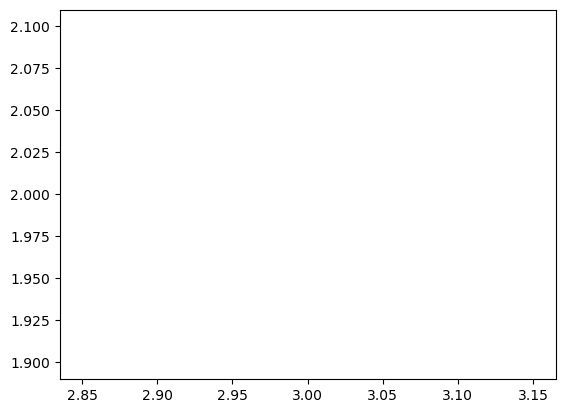

In [3]:
# So let's try with just one data point at position 3,2. The return value is 
# the plot itself, and JupyterLab will call display automatically on this to
# render it in the notebook.
plt.plot(3, 2)

We don't see the data points though, which is a bit odd. It turns out that the third argument to `plot` should be a string which signifies how we want that data point to be rendered. Let's use a period for a dot, and we'll see that our data point shows up.

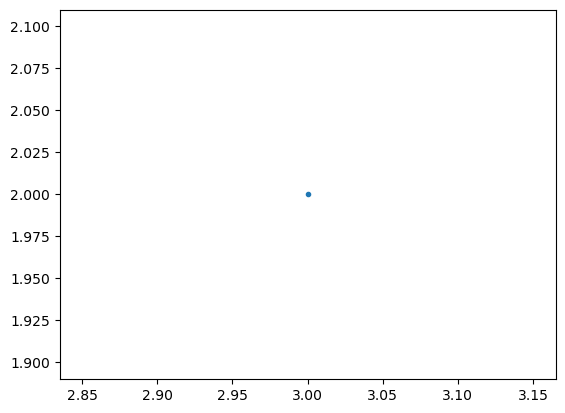

In [4]:
# The docs tell us what the different characters will render like, here we're just going
# to use a full stop for the marker
plt.plot(3, 2, '.')

You'll notice that the subsequent calls to plot have not updated our previous visualization. The backend we are using is not interactive, so subsequent calls create new plots as new cells in the notebook, and this is a handy way to iteratively explore your data.

Here's where some of the confusion with matplotlib as a library tends to come from. In the last lecture, I explained that there's an Artist layer, and that it is figures with subplots and axes and data points, which are rendered as patches onto these axes, but we haven't seen any of that here. Instead, we just called one function on a module named plot, so what's going on? The pyplot scripting interface is managing a lot of objects for you. It keeps track of the latest figure of subplots, and of the axis objects. Moreover, it actually hides some of these behind methods of its own. So the pyplot module itself has a function which is called plot, but it redirects calls to this function to the current axes object. This makes for a significant learning curve, and you'll see many discussions in web tutorials, and Stack Overflow, where people are confused by these two different approaches to making figures show up.

In data science workflows I think it's much more common to use the scripting layer, like we just did. But it's worth it to take a look at a the alternative object approach that's a bit more verbose. Actually, while some would call it the matplotlib object API, I think it's more accurate to think of it as directly interfacing with the Artist layer instead. 

In [5]:
# First, I'm going to import a new backend called FigureCanvasAgg.
from matplotlib.backends.backend_agg import FigureCanvasAgg
# Now we'll bring in the figure object
from matplotlib.figure import Figure

# I'll create a new empty figure
fig = Figure()

# And then associate this figure with the canvas backend
canvas = FigureCanvasAgg(fig)

# We can then add a subplot directly to this. We're going to talk more about subplots in a future 
# lecture, but this number 111 actually means that we just want one plot. The return value for the 
# subplot is the Axes object, which contains methods for plotting
ax = fig.add_subplot(111)

# Now we can plot on the Axes as per usual
ax.plot(3, 2, '.')

# We have a figure now, but out backend isn't able to render this directly inside of JupyterLab.
# So here I'll just save the figure to a png file instead.
canvas.print_png('test.png')

Then, we'll do a quick HTML cell magic, and execute that and see the rendered image. That's a lot more work than using the scripting layer, but you can see the effect is the same.

In [6]:
%%html
<img src='test.png' />

It's important to note though that the scripting layer isn't magic, it's just doing some of the behind the scenes work for us. For instance, when we make a call to pyplots `plot`, the scripting layer actually looks to see if there's a figure that currently exists, and if not, it creates a new one. It then returns the `Axes` for this figure.

We don't have to store that though, because we can always get access to the current `Figure` object using the `gcf` function, which stands for "get current figure". Similarly, we have another functions called `gca` -- "get current axes" -- which will return to us the current axes to render upon.

Let's create a new figure with pyplot, grab the axes, and set the x and y limits.

(0.0, 6.0, 0.0, 10.0)

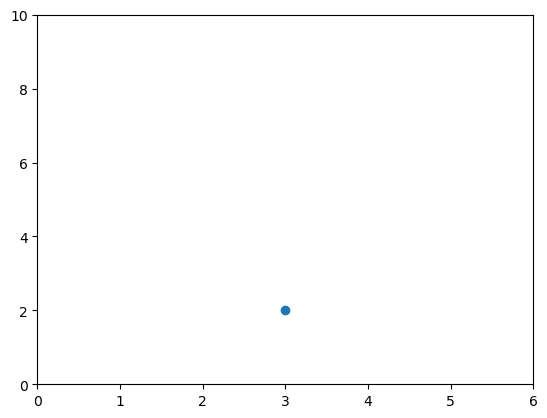

In [7]:
# Just create a figure as we previously did
plt.figure()

# Plot the point (3,2) -- this time I'll use the circle marker
plt.plot(3, 2, 'o')

# Get a reference to the current axes
ax = plt.gca()

# And set our axis properties. This function takes four parameters: a minimum value 
# for x which we'll put it zero, a maximum value for x which we'll put at six, and
# minimum and maximum y values.
ax.axis([0,6,0,10])

All right, one more demonstration on the fundamentals of putting together a plot. You can add Artists to an axes object at any time. Pyplot is doing this for us when we call the plot function. It's determining what shape we want from the string, the location associated with that shape, that it's creating a patch object, and adding that to the axes. If we make subsequent calls to the `plot` function before we render it the data will be added as different series, and colored differently.

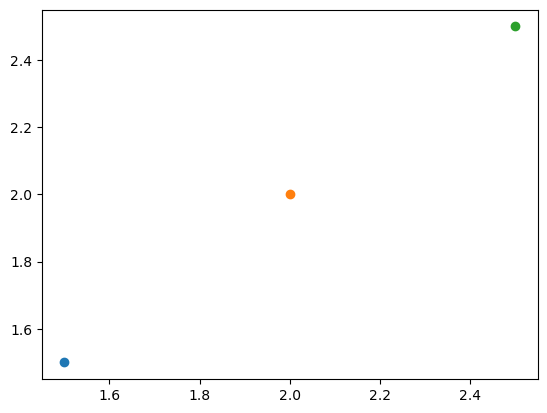

In [8]:
# I'll create a new figure
plt.figure()

# First I'll plot point (1.5, 1.5) using the circle marker
plt.plot(1.5, 1.5, 'o')

# Then a couple more
plt.plot(2, 2, 'o')
plt.plot(2.5, 2.5, 'o')

A lot of complexity is hidden from you, but we can go further with the `Axes` object, to the point where we can actually get all of the child objects that that axes contains. We do this with the axes `get_children` function. Let's take a look at what children exist in the current axes.

 Text(0.5, 1.0, ''),
 Text(0.0, 1.0, ''),
 Text(1.0, 1.0, ''),

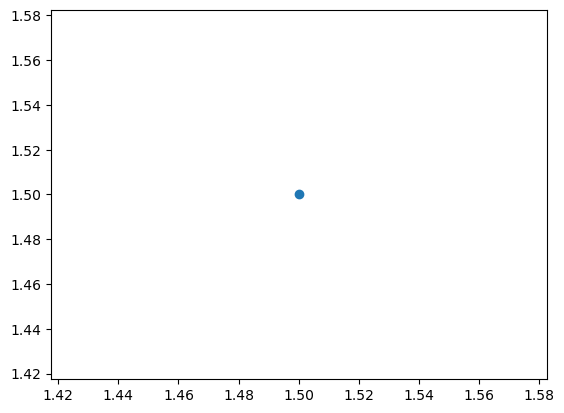

In [9]:
# Get current axes - this will create a new figure since we're in a new cell
ax = plt.gca()

# Let's add a point
plt.plot(1.5, 1.5, 'o')

# And take a look at all of the children of the Axes object
ax.get_children()

Here, we can see that there's actually a `Line2D` object contained in this axes, this is our data point! We also have a number of spines which are actual renderings of the borders of the frame including tic markers, two axis objects, and a bunch of text which are the labels for the chart. There's even a rectangle which is the background for the `Axes`.

Okay, so there's a whirlwind tour of how to be productive with matplotlib and make your first chart. Now, in truth, you're not going to spend a lot of time getting individual artists or interacting with splines, probably. But you can, if you want to. The system isn't magic, and now we've walked through how you can investigate a bit to better understand what's actually happening underneath.

In the next lecture, we're going to go through some of the different built-in charting options which are available to us.